In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import os

In [2]:
file_prefix = 'palomar/'

In [3]:
files = os.listdir(file_prefix)
print(files)

['calib49.fits', 'IMAGE49.fits', 'calib24.fits', 'calib65.fits', 'calib2.fits', 'calib32.fits', 'calib45.fits', 'calib12.fits', 'IMAGE45.fits', 'calib53.fits', 'calib28.fits', 'calib69.fits', 'calib68.fits', '.DS_Store', 'calib29.fits', 'calib52.fits', 'IMAGE44.fits', 'calib13.fits', 'calib44.fits', 'calib3.fits', 'calib33.fits', 'calib64.fits', 'calib72.fits', 'calib25.fits', 'IMAGE48.fits', 'calib48.fits', 'calib43.fits', 'calib14.fits', 'IMAGE43.fits', 'calib55.fits', 'calib8.fits', 'calib38.fits', 'calib18.fits', 'calib59.fits', 'calib22.fits', 'calib63.fits', 'calib34.fits', 'calib4.fits', 'calib35.fits', 'calib5.fits', 'calib62.fits', 'calib23.fits', 'calib58.fits', 'calib19.fits', 'calib9.fits', 'calib39.fits', 'calib54.fits', 'calib15.fits', 'calib42.fits', 'calib57.fits', 'calib16.fits', 'calib41.fits', 'calib36.fits', 'calib6.fits', 'calib61.fits', 'calib20.fits', 'calib21.fits', 'calib60.fits', 'calib37.fits', 'calib7.fits', 'calib40.fits', 'calib17.fits', 'calib56.fits', 'c

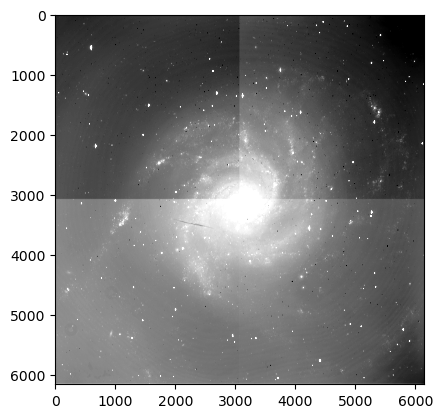

In [10]:
m101_i = file_prefix + "IMAGE45.fits"

hdul = fits.open(m101_i)
exp_time = hdul[0].header['EXPTIME']
m101_i_data = hdul['PRIMARY'].data[trim].astype(float)

plt.imshow(m101_i_data, vmin=np.percentile(m101_i_data, 1), vmax=np.percentile(m101_i_data, 99), cmap='Greys_r')

In [4]:
fits_image_filename = 'palomar/calib1.fits'
data = fits.open(fits_image_filename)
print(repr(data[0].header))

SIMPLE  =                    T / Java FITS: Fri May 05 12:36:46 PDT 2023        
BITPIX  =                   32                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                 6244                                                  
NAXIS2  =                 6160                                                  
EXTEND  =                    T / Extensions are permitted                       
EXPTIME =                  0.0 / Exposure time (seconds)                        
SENSORW =                 6144 / sensor width                                   
SENSORH =                 6160 / sensor height                                  
AMPCCDX =                    2 / Amplifiers per CCD X                           
AMPCCDY =                    2 / Amplifiers per CCD Y                           
TIMSCRP = 'wasp_10_8_2019.acf' / Archon asf file name                           
MODULE1 = 'None    '        

# Master Bias

In [5]:
trim = np.s_[:, 50:-50]

Text(0.5, 1.0, 'Master Bias')

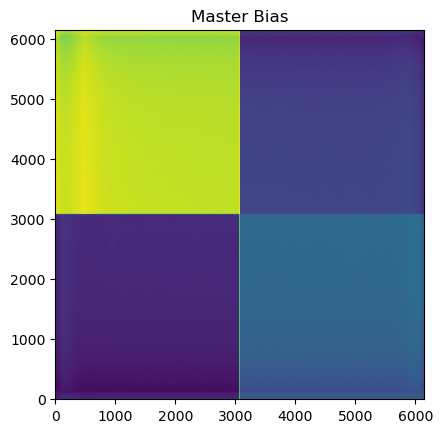

In [6]:
bias_range = range(1, 12)
biases = []
for i in bias_range:
    bias_file = file_prefix + f"calib{i}.fits"
    
    hdul = fits.open(bias_file)
    data = hdul['PRIMARY'].data[trim].astype(float)
    biases.append(data)
    
master_bias = np.median(biases, axis=0)
plt.imshow(master_bias, vmin=np.percentile(master_bias, 1), vmax=np.percentile(master_bias, 99), origin='lower')
plt.title('Master Bias')

# Master Flats

In [7]:
def make_master_flat(flat_range, plot=True):
    # TODO: how to adjust for bias?

    flats = []
    
    for i in flat_range:
        flat_file = file_prefix + f"calib{i}.fits"

        hdul = fits.open(flat_file)
        exp_time = hdul[0].header['EXPTIME']
        filt = hdul[0].header['FILTER']
        data = hdul['PRIMARY'].data[trim].astype(float)
        data -= master_bias
        data /= exp_time
        
        flats.append(data)

    master_flat = np.median(flats, axis=0)
    master_flat /= np.mean(master_flat)
    
    if plot:
        plt.imshow(master_flat, vmin=np.percentile(master_flat, 1), vmax=np.percentile(master_flat, 99), origin='lower')
        plt.title(f'Master Flat {filt}')
        plt.colorbar()
    
    return master_flat

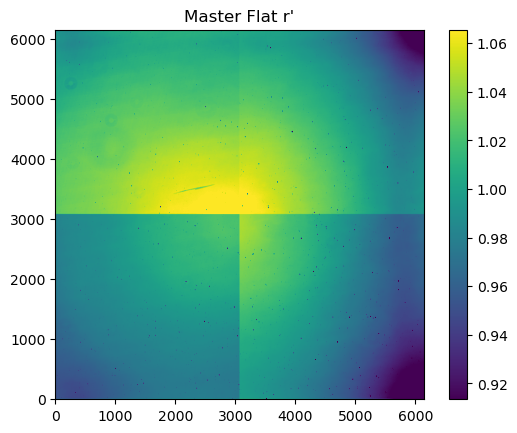

In [8]:
master_flat_r = make_master_flat(range(14, 27)) # r'

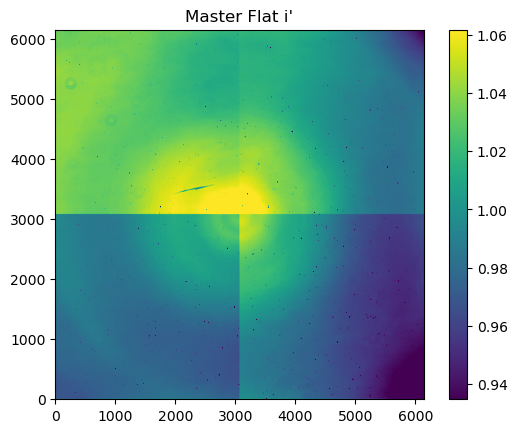

In [9]:
master_flat_i = make_master_flat(range(27, 39)) # i'

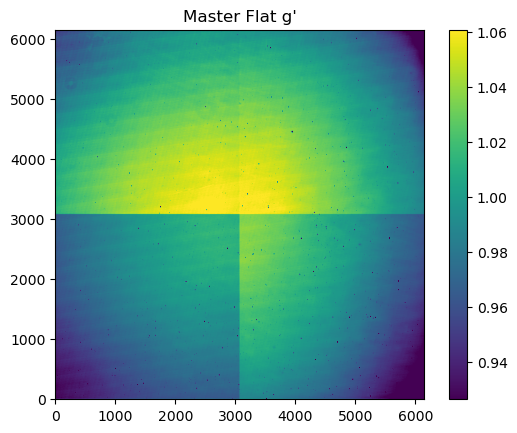

In [10]:
master_flat_g = make_master_flat(range(40, 52)) # g'

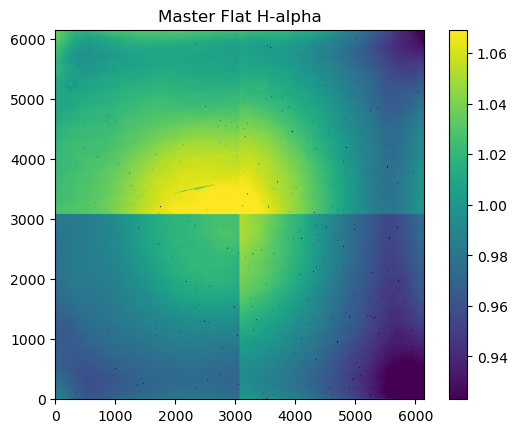

In [11]:
master_flat_halpha = make_master_flat(range(56, 67)) # h-alpha

# Image Processing

## r'

/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_11995/2313110870.py:13: RuntimeWarning: divide by zero encountered in divide
  m101_r_data = m101_r_data / master_flat_r
/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_11995/2313110870.py:13: RuntimeWarning: invalid value encountered in divide
  m101_r_data = m101_r_data / master_flat_r


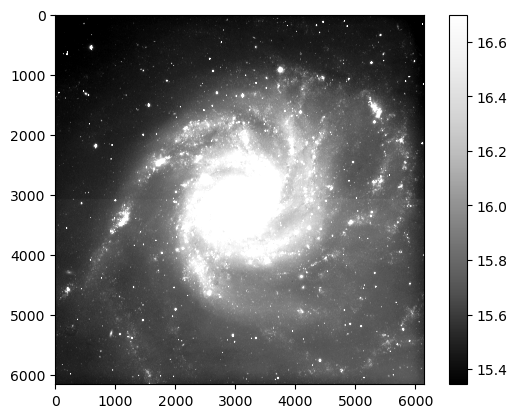

In [12]:
m101_r = file_prefix + "IMAGE44.fits"

hdul = fits.open(m101_r)
exp_time = hdul[0].header['EXPTIME']
m101_r_data = hdul['PRIMARY'].data[trim].astype(float)

# plt.figure()
# plt.imshow(m101_r_data, vmin=np.percentile(m101_r_data, 5), vmax=np.percentile(m101_r_data, 99), cmap='Greys_r')
# plt.colorbar()
# plt.show()

m101_r_data = m101_r_data - master_bias
m101_r_data = m101_r_data / master_flat_r
m101_r_data /= exp_time # TODO: divide by exposure time only for false color img; remove for science data analysis

plt.figure()
plt.imshow(m101_r_data, vmin=np.nanpercentile(m101_r_data, 5), vmax=np.nanpercentile(m101_r_data, 95), cmap='Greys_r')
# plt.imshow(master_flat_r)
plt.colorbar()
plt.show()

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kwargs)>

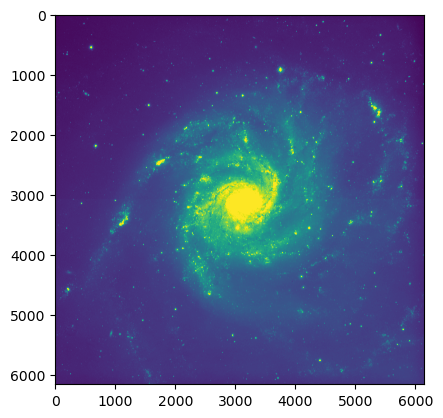

In [13]:
first_percentile = np.nanpercentile(m101_r_data, 1)
last_percentile = np.nanpercentile(m101_r_data, 99)

outliers = np.where(m101_r_data < first_percentile)
m101_r_data[outliers] = first_percentile

outliers = np.where(m101_r_data > last_percentile)
m101_r_data[outliers] = last_percentile

m101_r_data -= np.nanmin(m101_r_data)
m101_r_data /= np.nanmax(m101_r_data)

nans = np.where(np.isnan(m101_r_data))
m101_r_data[nans] = 0

plt.imshow(m101_r_data)
plt.colorbar

## g'

/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_11995/2139068499.py:8: RuntimeWarning: divide by zero encountered in divide
  m101_g_data = m101_g_data / master_flat_g
/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_11995/2139068499.py:8: RuntimeWarning: invalid value encountered in divide
  m101_g_data = m101_g_data / master_flat_g


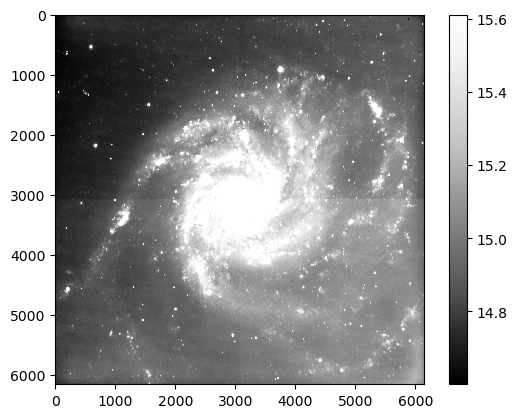

In [14]:
m101_g = file_prefix + "IMAGE43.fits"

hdul = fits.open(m101_g)
exp_time = hdul[0].header['EXPTIME']
m101_g_data = hdul['PRIMARY'].data[trim].astype(float)

m101_g_data = m101_g_data - master_bias
m101_g_data = m101_g_data / master_flat_g
m101_g_data /= exp_time

plt.figure()
plt.imshow(m101_g_data, vmin=np.nanpercentile(m101_g_data, 5), vmax=np.nanpercentile(m101_g_data, 95), cmap='Greys_r')
plt.colorbar()
plt.show()

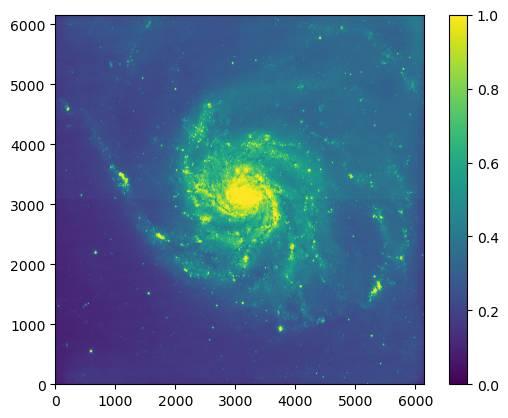

In [15]:
first_percentile = np.nanpercentile(m101_g_data, 1)
last_percentile = np.nanpercentile(m101_g_data, 99)


outliers = np.where(m101_g_data < first_percentile)
m101_g_data[outliers] = first_percentile

outliers = np.where(m101_g_data > last_percentile)
m101_g_data[outliers] = last_percentile

m101_g_data -= np.nanmin(m101_g_data)
m101_g_data /= np.nanmax(m101_g_data)

nans = np.where(np.isnan(m101_g_data))
m101_g_data[nans] = 0

plt.imshow(m101_g_data, origin='lower')
plt.colorbar()

## i'

/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_11995/2704035508.py:12: RuntimeWarning: invalid value encountered in divide
  m101_i_data = m101_i_data / master_flat_i


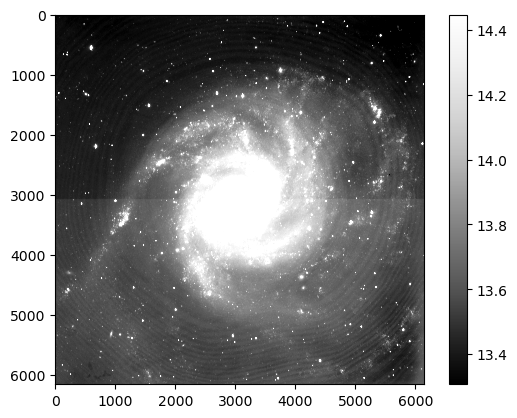

In [16]:
i_range = range(45, 48)

i_data = []
for i in i_range:
    i_file = file_prefix + f"IMAGE{i}.fits"
    
    hdul = fits.open(i_file)
    exp_time = hdul[0].header['EXPTIME']
    m101_i_data = hdul['PRIMARY'].data[trim].astype(float)

    m101_i_data = m101_i_data - master_bias
    m101_i_data = m101_i_data / master_flat_i
    m101_i_data /= exp_time
    
    i_data.append(m101_i_data)
    
m101_i_data = np.median(i_data, axis=0)

plt.figure()
plt.imshow(m101_i_data, vmin=np.nanpercentile(m101_i_data, 5), vmax=np.nanpercentile(m101_i_data, 95), cmap='Greys_r')
plt.colorbar()
plt.show()

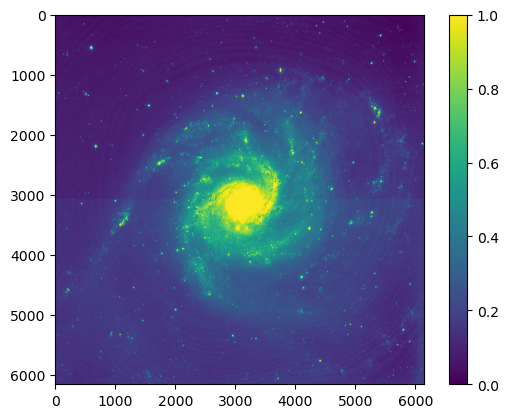

In [17]:
first_percentile = np.nanpercentile(m101_i_data, 1)
last_percentile = np.nanpercentile(m101_i_data, 99)


outliers = np.where(m101_i_data < first_percentile)
m101_i_data[outliers] = first_percentile

outliers = np.where(m101_i_data > last_percentile)
m101_i_data[outliers] = last_percentile

m101_i_orig = np.copy(m101_i_data)

m101_i_data -= np.nanmin(m101_i_data)
m101_i_data /= np.nanmax(m101_i_data)

nans = np.where(np.isnan(m101_i_data))
m101_i_data[nans] = 0

plt.imshow(m101_i_data)
plt.colorbar()

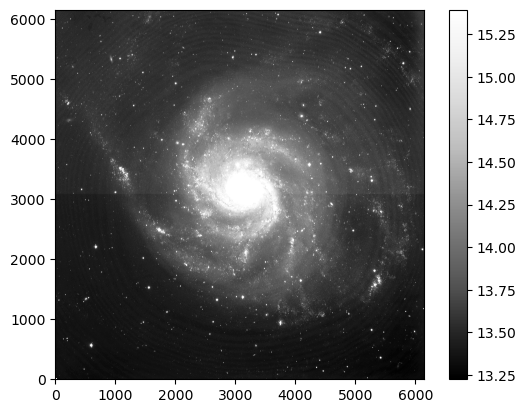

In [18]:
plt.imshow(m101_i_orig, cmap='Greys_r', origin='lower')
plt.colorbar()
hdu = fits.PrimaryHDU(m101_i_orig)
hdul = fits.HDUList([hdu])
hdul.writeto('corrected_i_mean.fits',overwrite=True)

## h-alpha

/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_11995/3800235106.py:12: RuntimeWarning: divide by zero encountered in divide
  m101_halpha_data = m101_halpha_data / master_flat_halpha
/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_11995/3800235106.py:12: RuntimeWarning: invalid value encountered in divide
  m101_halpha_data = m101_halpha_data / master_flat_halpha


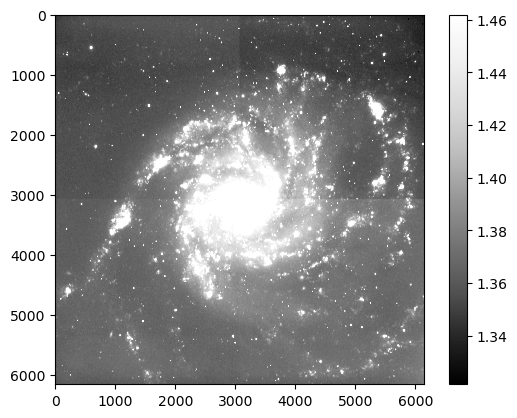

In [20]:
halpha_range = range(48, 51)

halpha_data = []
for i in halpha_range:
    halpha_file = file_prefix + f"IMAGE{i}.fits"
    
    hdul = fits.open(halpha_file)
    exp_time = hdul[0].header['EXPTIME']
    m101_halpha_data = hdul['PRIMARY'].data[trim].astype(float)

    m101_halpha_data = m101_halpha_data - master_bias
    m101_halpha_data = m101_halpha_data / master_flat_halpha
    m101_halpha_data /= exp_time
    
    halpha_data.append(m101_halpha_data)
    
m101_halpha_data = np.median(halpha_data, axis=0)

plt.figure()
plt.imshow(m101_halpha_data, vmin=np.nanpercentile(m101_halpha_data, 5), vmax=np.nanpercentile(m101_halpha_data, 95), cmap='Greys_r')
plt.colorbar()
plt.show()

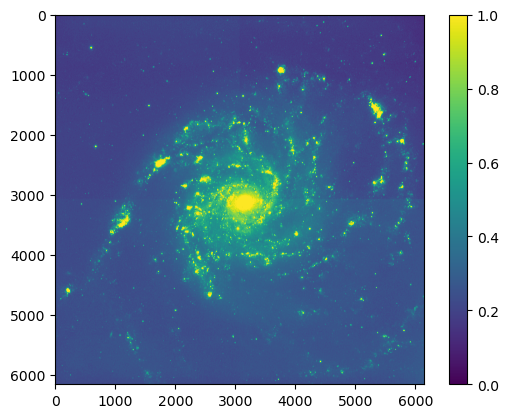

In [21]:
first_percentile = np.nanpercentile(m101_halpha_data, 1)
last_percentile = np.nanpercentile(m101_halpha_data, 99)


outliers = np.where(m101_halpha_data < first_percentile)
m101_halpha_data[outliers] = first_percentile

outliers = np.where(m101_halpha_data > last_percentile)
m101_halpha_data[outliers] = last_percentile

m101_halpha_orig = np.copy(m101_halpha_data)
m101_halpha_data -= np.nanmin(m101_halpha_data)
m101_halpha_data /= np.nanmax(m101_halpha_data)

nans = np.where(np.isnan(m101_halpha_data))
m101_halpha_data[nans] = 0

plt.imshow(m101_halpha_data)
plt.colorbar()

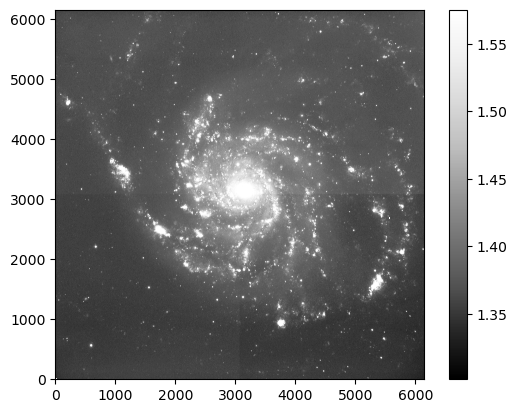

In [22]:
plt.imshow(m101_halpha_orig, cmap='Greys_r', origin='lower')
plt.colorbar()
hdu = fits.PrimaryHDU(m101_halpha_orig)
hdul = fits.HDUList([hdu])
hdul.writeto('corrected_halpha_mean.fits',overwrite=True)

# False Color Image

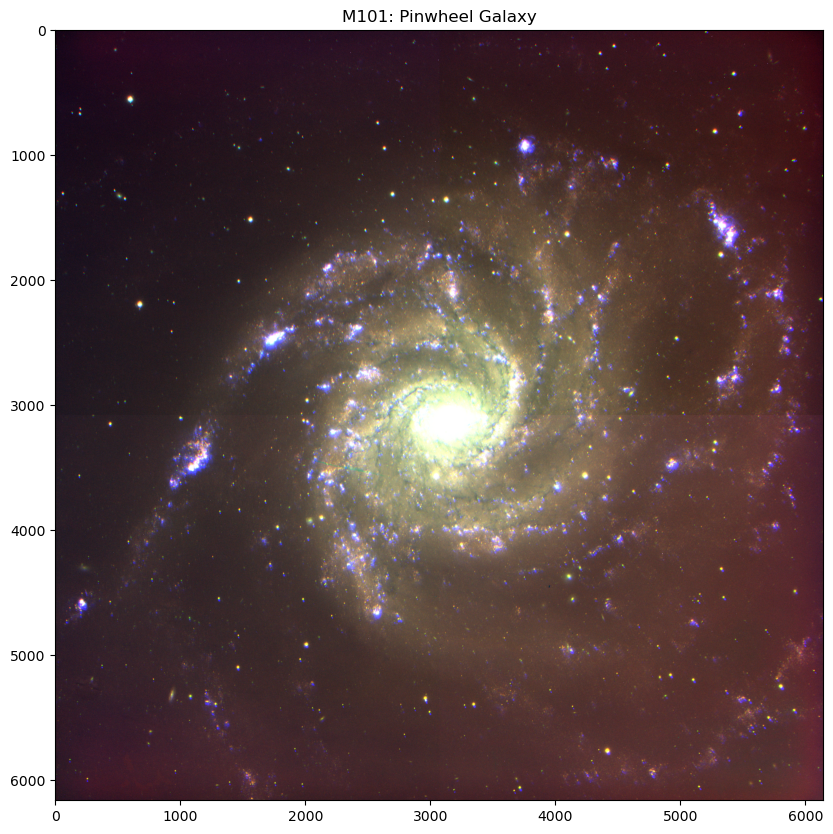

In [21]:
# rgb image with imshow
# shape: (x, y, 3) --> last axis is channel order
# float arr have to go from 0 to 1, int arr go from 0 to 255
# remove outliers (set less than first percentile to first percentile)
# could do 4 channels with transparency adjusted by halpha

# stacked = m101_r_data + m101_g_data + m101_i_data + m101_halpha_data


rgbArray = np.zeros((6160,6144,3), 'float')
rgbArray[..., 0] = m101_g_data
rgbArray[..., 1] = m101_r_data
rgbArray[..., 2] = m101_halpha_data

# img_data = np.array([m101_r_data, m101_g_data, m101_halpha_data]).reshape((6160, 6244, 3))
plt.figure(figsize=(10, 10))
plt.imshow(rgbArray)
plt.title("M101: Pinwheel Galaxy")
plt.show()